## Q 5 a

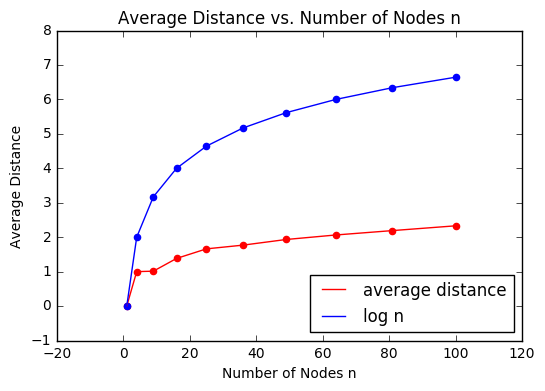

In [1]:
import random
import numpy as np
random.seed(1989)

# Make a function that generate Watts-Strongatz model for a specific r

def WS(r):
    # For r = 1 to 10 (or n = 1 to 100), generate networks according to the Watts-Strogatz model with k = 2 and l = 2. 
    # Store in adjacency list in python dictionary
    # key is tuple (i,j) where i and j are x-axes and y-axes index
    # value is list of tuples that represent neighbors
 
    adj_list={} # declare empty dictionary
    for i in range(0,r):
        for j in range(0,r):
            adj_list[(i,j)]=[(i+1,j),(i-1,j),(i,j+1),(i,j-1), 
                             (i+2,j),(i,j+2),(i-2,j),(i,j-2), 
                             (i+1,j+1),(i+1,j-1),(i-1,j-1),(i-1,j+1)]
            # delete those nodes non-exist, using list comprehension
            adj_list[(i,j)]=[e for e in adj_list[(i,j)] if e[0]>=0 and e[1]>=0 and e[0]<=r-1 and e[1]<=r-1]
    
    # long edges only apply to r >=3
    # Use configuration model to generate random un-directed edges:
    # 1. each node has two random edges, we put 2*n half edge in a list
    # 2. use permutation to randomly allocate the list
    # 3. the two nodes that are near each other will be connected
    
    if r>=3:
        rand_node=list(adj_list.keys())*2
        random.shuffle(rand_node) 
        for k in range(0,len(rand_node),2):
            adj_list[rand_node[k]].append(rand_node[k+1]) # append long-range random nodes to the node's neighbor
            adj_list[rand_node[k+1]].append(rand_node[k]) # n-directed
    
    return adj_list




# Now, we have generated the Watts-Strongatz model with n nodes

# We will use the Floyd-Warshall algorithm to calculate all pairs distance

def floydwarshall(graph):
     
    # Step 1: initialize dist and pred:
    # copy graph into dist, but add inifinite where there is no edge, and 0 in diagonal
    
    # initialize dist as Shortest distance between each pair of nodes
    # initialize pred as Predecesors in shortest path
    dist={} # declare empty dictionary
    pred={} # declare empty dictionary
    nodes=list(graph.keys()) # all nodes in the graph as a list of tuples
    # First loop through all nodes
    for u in nodes:
        dist[u]={}# values in dist dictionary is a dictionary as well
        pred[u]={} # values in pred dictionary is a dictionary as well
        for v in nodes:
            dist[u][v]=float('inf') # the distance between u and v is infinity, if there is no link
            pred[u][v]=-1 # predecessor is -1 if no path between u and v
        dist[u][u]=0 # self-distance is zero
        # Within the first loop, set the distance between neighbors to 1
        neighbor=graph[u]
        for n in neighbor:
            dist[u][n]=1
            pred[u][n]=u  
    # Step 2: 
    for t in nodes:
        # givcen dist u to u, check if path u-t-v is shorter
        for u in nodes:
            for v in nodes:
                newdist=dist[u][t]+dist[t][v]
                if newdist < dist[u][v]:
                    dist[u][v]=newdist
                    pred[u][v]=pred[t][v] #route new path through t
    
    return dist,pred

# Make a function to calculate the average distance between any two nodes  

def AveDist(graph,dist,r):
    
    # for r=1,2:
    if r == 1:
        ave_dist=0
    elif r ==2:
        ave_dist=1
    else:
        nodes=list(graph.keys())
        dist_list=[] # initialize placeholder for distances
        for u in nodes:
            for v in nodes:
                dist_list.append(dist[u][v])
        ave_dist=np.mean(dist_list)
    return ave_dist
 
    
# Now, call above pre-defined functions and Make a final function that run through r=1 to 10, or n=1 to 10
# Plot the average distance between any two nodes as a function
# of n and plot the function log n 
 
%matplotlib inline
import matplotlib
import math
from matplotlib import pyplot as plt # use matplotlib's pyplot package

def distPlot(r):
    x=[] # palce holder for n
    y=[]# placeholder for average distance
    z=[] # placeholder for log n
    for i in range(1,r+1):
        x.append(i**2)
        mygraph=WS(i)
        mydist, mypred=floydwarshall(mygraph)
        y.append(AveDist(mygraph,mydist,i))
        z.append(math.log(i**2,2))
     
    plt.figure(1) # declare a figure
    ax1 = plt.subplot(111)
    plt.scatter(x, y, color="red") 
    line1, =plt.plot(x, y, color="red", label="average distance") 
    plt.scatter(x, z, color="blue") 
    line2, =plt.plot(x, z, color="blue", label="log n" )
    plt.xlabel('Number of Nodes n') # label x-axis
    plt.ylabel('Average Distance') # label y-axis
    plt.title('Average Distance vs. Number of Nodes n')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(handles=[line1], loc=1)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)
    # Create another legend for the second line.
    plt.legend(handles=[line1,line2], loc=4)
    
    plt.show()
    
distPlot(10)    

## Q 5 b

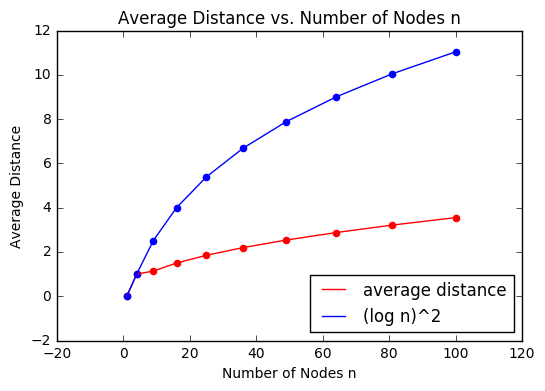

In [2]:
import random
import numpy as np
from numpy.random import choice
random.seed(1989)

# Make a function that generate Kleinburg model for a specific r

def Kleinburg(r):
    # For r = 1 to 10 (or n = 1 to 100), generate networks according to the Kleinburg model with k = 2 and l = 2. 
    # Store in adjacency list in python dictionary
    # key is tuple (i,j) where i and j are x-axes and y-axes index
    # value is list of tuples that represent neighbors
 
    adj_list={} # declare empty dictionary
    for i in range(0,r):
        for j in range(0,r):
            adj_list[(i,j)]=[(i+1,j),(i-1,j),(i,j+1),(i,j-1), 
                             (i+2,j),(i,j+2),(i-2,j),(i,j-2), 
                             (i+1,j+1),(i+1,j-1),(i-1,j-1),(i-1,j+1)]
            # delete those nodes non-exist, using list comprehension
            adj_list[(i,j)]=[e for e in adj_list[(i,j)] if e[0]>=0 and e[1]>=0 and e[0]<=r-1 and e[1]<=r-1]
    
    # long edges only apply to r >=3
    if r>=3:
        nodes=list(adj_list.keys())
        for node in nodes:
            neighbor=adj_list[node]
            not_neighbor=[e for e in nodes if e not in neighbor and e != node]
            # some nodes already connected to every other node
            if len(not_neighbor)>=1:
                # calculate distance between 
                temp=list(map(lambda v: (abs(v[0]-node[0])+abs(v[1]-node[1]))**(-2), not_neighbor))
                prob=list(map(lambda x: x/sum(temp), temp))
                sample=choice(range(0,len(not_neighbor)), 2, p=prob, replace=False) # randonly pick 2 nodes without replacement
                adj_list[node].append(sample[0]) # append long-range random nodes to the node's neighbor
                adj_list[node].append(sample[1])
    
    return adj_list

 
# Now, we have generated the Kleinburg model with n nodes

# We will use the Floyd-Warshall algorithm to calculate all pairs distance

def floydwarshall(graph):
     
    # Step 1: initialize dist and pred:
    # copy graph into dist, but add inifinite where there is no edge, and 0 in diagonal
    
    # initialize dist as Shortest distance between each pair of nodes
    # initialize pred as Predecesors in shortest path
    dist={} # declare empty dictionary
    pred={} # declare empty dictionary
    nodes=list(graph.keys()) # all nodes in the graph as a list of tuples
    # First loop through all nodes
    for u in nodes:
        dist[u]={}# values in dist dictionary is a dictionary as well
        pred[u]={} # values in pred dictionary is a dictionary as well
        for v in nodes:
            dist[u][v]=float('inf') # the distance between u and v is infinity, if there is no link
            pred[u][v]=-1 # predecessor is -1 if no path between u and v
        dist[u][u]=0 # self-distance is zero
        # Within the first loop, set the distance between neighbors to 1
        neighbor=graph[u]
        for n in neighbor:
            dist[u][n]=1
            pred[u][n]=u  
    # Step 2: 
    for t in nodes:
        # givcen dist u to u, check if path u-t-v is shorter
        for u in nodes:
            for v in nodes:
                newdist=dist[u][t]+dist[t][v]
                if newdist < dist[u][v]:
                    dist[u][v]=newdist
                    pred[u][v]=pred[t][v] #route new path through t
    
    return dist,pred

# Make a function to calculate the average distance between any two nodes  

def AveDist(graph,dist,r):
    
    # for r=1,2:
    if r == 1:
        ave_dist=0
    elif r ==2:
        ave_dist=1
    else:
        nodes=list(graph.keys())
        dist_list=[] # initialize placeholder for distances
        for u in nodes:
            for v in nodes:
                dist_list.append(dist[u][v])
        ave_dist=np.mean(dist_list)
    return ave_dist
 
    
# Now, call above pre-defined functions and Make a final function that run through r=1 to 10, or n=1 to 10
# Plot the average distance between any two nodes as a function
# of n and plot the function (log n )^2
 
%matplotlib inline
import matplotlib
import math
from matplotlib import pyplot as plt # use matplotlib's pyplot package

def distPlot(r):
    x=[] # palce holder for n
    y=[]# placeholder for average distance
    z=[] # placeholder for log n
    for i in range(1,r+1):
        x.append(i**2)
        mygraph=Kleinburg(i)
        mydist, mypred=floydwarshall(mygraph)
        y.append(AveDist(mygraph,mydist,i))
        z.append(math.log(i,2)**2)
     
    plt.figure(1) # declare a figure
    ax1 = plt.subplot(111)
    plt.scatter(x, y, color="red") 
    line1, =plt.plot(x, y, color="red", label="average distance") 
    plt.scatter(x, z, color="blue") 
    line2, =plt.plot(x, z, color="blue", label="(log n)^2" )
    plt.xlabel('Number of Nodes n') # label x-axis
    plt.ylabel('Average Distance') # label y-axis
    plt.title('Average Distance vs. Number of Nodes n')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(handles=[line1], loc=1)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)
    # Create another legend for the second line.
    plt.legend(handles=[line1,line2], loc=4)
    
    plt.show()
    
distPlot(10)  

## Q 5 c

In [1]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url1="http://www.hcs.harvard.edu/~cs134-spring2017/wp-content/uploads/2017/01/enron.txt"
url2="http://www.hcs.harvard.edu/~cs134-spring2017/wp-content/uploads/2017/01/epinions.txt"

# Save file locally
urlretrieve(url1, "enron.txt")
urlretrieve(url2, "epinions.txt")


# Make a function that turns the data frame into adjacency list
def makeGraph(data):
    adj_list={} # declare empty dictionary
    for index, row in data.iterrows():
        if row[0] in list(adj_list.keys()):
            adj_list[row[0]].append(row[1])
        else:
            adj_list[row[0]]=[row[1]]
    return adj_list


# Original network is too large for the Floyd-Warshall aogorithm to work through efficiently
# Therefore, I sample 500 nodes from the network, and make a sample subgraph 
# which should be a good estimate.

import random

def sampleGraph(graph, sample):
    #initialize placeholder for sample graph
    subgraph={}
    nodes=list(graph.keys())
    sample_nodes=random.sample(nodes, sample)
    # subset the edges
    for v in sample_nodes:
        subgraph[v]=[x for x in graph[v] if x  in sample_nodes  ]
    return subgraph


def floydwarshall(graph):
     
    # Step 1: initialize dist and pred:
    # copy graph into dist, but add inifinite where there is no edge, and 0 in diagonal
    
    # initialize dist as Shortest distance between each pair of nodes
    # initialize pred as Predecesors in shortest path
    dist={} # declare empty dictionary
    pred={} # declare empty dictionary
    nodes=list(graph.keys()) # all nodes in the graph as a list of tuples
    # First loop through all nodes
    for u in nodes:
        dist[u]={}# values in dist dictionary is a dictionary as well
        pred[u]={} # values in pred dictionary is a dictionary as well
        for v in nodes:
            dist[u][v]=float('inf') # the distance between u and v is infinity, if there is no link
            pred[u][v]=-1 # predecessor is -1 if no path between u and v
        dist[u][u]=0 # self-distance is zero
        # Within the first loop, set the distance between neighbors to 1
        neighbor=graph[u]
        for n in neighbor:
            dist[u][n]=1
            pred[u][n]=u  
    # Step 2: 
    for t in nodes:
        # givcen dist u to u, check if path u-t-v is shorter
        for u in nodes:
            for v in nodes:
                newdist=dist[u][t]+dist[t][v]
                if newdist < dist[u][v]:
                    dist[u][v]=newdist
                    pred[u][v]=pred[t][v] #route new path through t
    
    return dist,pred


# Make a function to calculate the average distance between any two nodes  
import numpy as np
def AveDist(graph,dist):
    nodes=list(graph.keys())
    dist_list=[] # initialize placeholder for distances
    for u in nodes:
        for v in nodes:
            dist_list.append(dist[u][v])
        ave_dist=np.mean(dist_list)
    return ave_dist
 


In [2]:
enron_data = pd.read_table('enron.txt',header=None)
enron_graph=makeGraph(enron_data) 
enron_graph_sample=sampleGraph(enron_graph, 100)
enron_dist, enron_pred=floydwarshall(enron_graph_sample)
print("The average distance (calculated by sampling) in the enron network is:", AveDist(enron_graph_sample, enron_dist))

The average distance (calculated by sampling) in the enron network is: inf


In [3]:
epinions_data = pd.read_table('epinions.txt',header=None)
epinions_graph=makeGraph(epinions_data)
epinions_graph_sample=sampleGraph(epinions_graph, 100)
epinions_dist, enron_pred=floydwarshall(epinions_graph_sample)
print("The average distance (calculated by sampling) in the epinions network is:", AveDist(epinions_graph_sample, epinions_dist))




The average distance (calculated by sampling) in the epinions network is: inf


In [4]:
livejournal_data = pd.read_table('livejournal.txt',header=None)
livejournal_graph=makeGraph(livejournal_data)
livejournal_graph_sample=sampleGraph(livejournal_graph, 100)
livejournal_dist, livejournal_pred=floydwarshall(livejournal_graph_sample)
print("The average distance (calculated by sampling) in the livejournal network is:", AveDist(livejournal_graph_sample, livejournal_dist))




KeyboardInterrupt: 